# **Week 8: Object-Oriented Programming (continued) + Exploring Data**

In [1]:
#imports
from datetime import date
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Classes and objects
Remember: classes are like *recipes* and objects are what you *make with them*. You can use the same recipe to make many things, and you can change pieces of the recipe to fit your needs.

#### Example class code
Let's go over how to use classes and objects in detail. Run the code below to load in our custom `Experiment` class.

In [2]:
#Run this code to load the class. Try using shift-enter!
class Experiment:

    #this is a constructor - it runs anytime you create an object  
    def __init__(self, path_to_expt, expt_date, experimenter):
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
        print('Constructor called')

    #this is a function, that's associated with the class    
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        
    #ditto
    def return_data(self):
        return 'There is no data here for now'

Let's pause to go through what's inside the class code. 
First, we have a function called `__init__`. This is a **constructor**, and it will be run anytime you create an object from this class. The constructor is a place to put commands that you create an object: for example, here we assign some attributes (or variables) associated with out class.

Let's see the constructor in action by creating an object. First, we create an object named `expt`, by calling `Experiment` and providing information. This process is called **instantiation**.

In [4]:
expt = Experiment('data/exp_01', expt_date='2025-10-20', experimenter='Kira')

Constructor called


What happened here is we created an object called `expt` from Experiment, which automatically ran the constructor. Notice that when we instantiated our object, we provided information to the function call, just like you would with any other function. We can access this data, as in our constructor we save the data to the object using the **self** command.

In [ ]:
expt.generated_date
# why are we using expt and not self --> because expt is the named object!!!!
#obejcts are like cakes made from this recipe -- can be different cakes
#expt is the object that we made in cell avoce -- a specific experement

datetime.date(2025, 10, 21)

We've already seen attributes (this is a fancy way of saying 'a variable that is associated with an object') before - can you think of an example?


We can also call functions within the class. For example:

In [6]:
expt.print_expt_info()

Path:  data/exp_01
Experiment Date:  2025-10-20
Experimenter:  Kira
Generation Date:  2025-10-21


In [ ]:
Experiment.print_expt_info(self=expt)
# a more efficient version of calling it

Path:  data/exp_01
Experiment Date:  2025-10-20
Experimenter:  Kira
Generation Date:  2025-10-21


Notes:
Kind of confused about what the point of uses classes and objects is

what would be the benefit of using this -- how could I apply this in work

What happens if we try to call the function directly?

In [8]:
print_expt_info()
#Experiment.print_expt_info()

NameError: name 'print_expt_info' is not defined

In OOP, self refers to the *object itself*. That is to say: you can't call a function without an object - let's scroll back up to understand why. We can get a little hacky and pass in the object though.

In [ ]:
Experiment.print_expt_info(self=expt)

This is what happens when you call functions from a class - it just happens to pass `self` (a reference to the object) in for you!

### Problem 1

Modify the code from the cells above to add another argument to the constructor - it can be whatever you want it to be. Then, create an object of your class, and call  `print_expt_info`.

In [ ]:
#Run this code to load the class. Try using shift-enter!
class Experiment:

    #this is a constructor - it runs anytime you create an object  
    def __init__(self, path_to_expt, expt_date, experimenter, larva): #add new arg to constructors here ,new thing
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
        self.larva = larva #added new arg --> put it up top too
        print('Constructor called')

    #this is a function, that's associated with the class    
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        print('Larva Genotype: ', self.larva) # need to add something that it will print!
        
    #ditto
    def return_data(self):
        return 'There is no data here for now'

In [30]:
expt1 = Experiment('data/exp_02', expt_date='2025-10-21', experimenter='Kira', larva ='1260')

Constructor called


In [31]:
expt1.print_expt_info()

Path:  data/exp_02
Experiment Date:  2025-10-21
Experimenter:  Kira
Generation Date:  2025-10-21
Larva Genotype:  1260


#### Making multiple objects
A class can support many independent objects! Back to the analogy: if I have two recipes for a pumpkin pie, I can make two pumpkin pies, and if I put whipped cream on one, then it won't magically appear on the other.

Let's make two objects from a new class, and see if modifying one affects the other. |

In [32]:
class BehaviorExperiment:
    
    def __init__(self, head_turn, freezing):
        self.head_turn = head_turn
        self.freezing = freezing
        self.time = date.today()
        
    def print_info(self):
        print(self.head_turn)
        print(self.freezing)
        print(self.time)
        
    def calc_velocity(self):
        self.velocity = self.head_turn * 2
        return self.velocity

In [33]:
beh_expt1 = BehaviorExperiment(5, True)
beh_expt1.print_info()

5
True
2025-10-21


In [34]:
velocity = beh_expt1.calc_velocity()
print(velocity)

10


In [ ]:
beh_expt2 = BehaviorExperiment(20, False)
beh_expt1.print_info()
beh_expt2.print_info()

#can generate multiple objects from the same class!
# is this like an easy way to see all the information about something

5
True
2025-10-21
20
False
2025-10-21


### Inheritance and polymorphism

As I mentioned earlier, one of the important features of OOP is modularity. Let's go back to the recipe analogy I mentioned earlier. Say we had a recipe for cooking a cake, in general. What if we wanted to bake a vanilla cake? I could write a totally new recipe, but that would be redundant. Instead, what I could do is simply change the section where I add flavorings to the cake mix.

Inheritance is exactly this concept: you can create child classes that inherit functionality from a parent class. Let's see what this means using an example.

In [36]:
#Run this code to load the class
class Experiment:
        
    def __init__(self, path_to_expt, expt_date, experimenter):
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
        print('Constructor called')
        
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        
    def return_data(self):
        return 'There is no data here for now'

Now, we have a small child class that **inherits** from and **extends** a parent class. Notice the syntax: we just place the name of the parent class in the parenthes at the beginning of the class.

In [70]:
#take note of how we've added 'Experiment' within the parentheses of the class definition
class ImagingExperiment(Experiment):
    
    def __init__(self, path_to_expt, expt_date, experimenter, frame_rate):
        self.frame_rate = frame_rate
        #Super refers to our parent class
        print('Imaging constructor called')
        super().__init__(path_to_expt, expt_date, experimenter)
    
    #This is a new function!
    def print_frame_rate(self):
        print('Frame Rate: {} Hz'.format(self.frame_rate))
    
    #This is an old function we modified!
    def return_data(self):
        return 'Pretend that I am imaging data' 
    
    def print_expt_info(self):
        super().print_expt_info() #this tells python to look for the method defined in the parent class
        print('Frame Rate: ', self.frame_rate)

Let's start by creating an object of our new class: anyone remember how to do this?

In [71]:
imaging_expt = ImagingExperiment('data/imaging_exp_01', expt_date= '2025-10-21', experimenter = 'Kira', frame_rate=30)

Imaging constructor called
Constructor called


In [72]:
imaging_expt.print_expt_info()
# this is just printing from the parent class

Path:  data/imaging_exp_01
Experiment Date:  2025-10-21
Experimenter:  Kira
Generation Date:  2025-10-21
Frame Rate:  30


In [50]:
imaging_expt.return_data()

'Pretend that I am imaging data'

A few things to unpack: <br>
1) Notice how we are providing one more argument to the constructor. Let's figure out where this number goes.
2) See how the child constructor is called first, and then the constructor for the parent experiment class?
3) What do we think the type of our new object will be?

In [49]:
type(imaging_expt)

__main__.ImagingExperiment

Now, let's understand these new functions.

In [51]:
imaging_expt.print_frame_rate()

Frame Rate: 30 Hz


That seems self-explanatory - that's a new function we added. Do the old ones still work?

In [52]:
imaging_expt.print_expt_info()

Path:  data/imaging_exp_01
Experiment Date:  2025-100-21
Experimenter:  Kira
Generation Date:  2025-10-21


Ok, what about return_data? What do we think it will output?

In [53]:
imaging_expt.return_data()

'Pretend that I am imaging data'

See how we've created a new version of `return_data`? This is called polymorphism - a single function can take many forms in OOP. This is useful, because often you want a child class to subtly modify or add to a parent class. Think about a vegan cake - the general steps might be the same, but you'd want to go back and modify some of the tasks you're peforming to include different ingredients.

### Problem 2
Just as we did with ImagingExperiment, create a class called BehaviorExperiment that inherits from Experiment. In this class, please take in a `behavior_task` variable instead of `frame_rate`. Create a new function in lieu of `frame_rate` to print your `behavior_task`.  In addition, please write a modified `return_data` function to print your behavior task. Use the templates above and don't be afraid of copying and pasting!

In [ ]:
class BehaviorExperiment(Experiment): #putting Experiment in paratheses calls the parent class
    
    def __init__(self, path_to_expt, expt_date, experimenter, behavior_task):
        self.behavior_task = behavior_task
        #Super refers to our parent class
        print('Behavior constructor called')
        super().__init__(path_to_expt, expt_date, experimenter)
    
    #This is a new function!
    def print_behavior_task(self):
        print('Behavior Task: {}'.format(self.behavior_task))
    
    #This is an old function we modified!
    def return_data(self):
        return 'Pretend I behavioral data' 
    
    def print_expt_info(self):
        super().print_expt_info() #this tells python to look for the method defined in the parent class
        print('Behavior Task: ', self.behavior_task) #this allows us to print the 

In [68]:
behavior_expt = BehaviorExperiment('data/imaging_exp_02', expt_date= '2025-10-21', experimenter = 'Kira', behavior_task= 'Crawling Speed')

Behavior constructor called
Constructor called


In [69]:
behavior_expt.print_expt_info()

Path:  data/imaging_exp_02
Experiment Date:  2025-10-21
Experimenter:  Kira
Generation Date:  2025-10-21
Behavior Task:  Crawling Speed


# Switching gears - exploring other people's data.


Time to be real scientists. We are going to analyse data collected in [High-dimensional geometry of population responses in visual cortex](https://www.nature.com/articles/s41586-019-1346-5).

### Problem 3

1. Try to find where the data is available (hint: Nature and many other journals have a "Data availability" section).
2. There are many different files stored in the repository. We want to download the data recorded in mouse "M170717" on August 25, 2017. To figure out how the files are stored, consult the instructions on [Github repository](https://github.com/MouseLand/stringer-pachitariu-et-al-2018b). (**Important:** You would want to download the neural recordings, not the stimulus set!)

## Getting to know the dataset

I've already prepared a numpy array containing the specific responses. Below we're loading it into the notebook:

In [35]:
recording = np.load('recording.npy')

How is this array structured?

In [ ]:
recording.shape

It contains the responses of 11,523 neurons to 480 stimuli.

### Problem 4

To get some idea of the data, let's plot a histogram of the first neuron's responses across all presented images. Let's try to use documentaion and google to figure out how to do this. At this point, we just quickly want to get an idea for the format of the data. Since it is a numpy array, matplotlib is perfect for this.

In [ ]:
plt.hist(recording[:,0])

In [ ]:
plt.hist(recording[:,0], bins=30)

In [ ]:
recording

This data is extremely high-dimensional and so it is difficult to get a good idea of structures within this data simply from examining it. **Machine learning** makes this general problem tractable.

## Introduction to Machine learning

In science, we routinely break a vague question ("How does the brain represent orientation?") down into more specific components ("How do neurons in visual cortex respond to oriented gratings?") and then settle on a particular methodology to answer the concrete questions (e.g. record calcium traces using 2-photon imaging).

Machine learning is no different. In our case, our vague question is "What is the structure of our data?". One concrete way of asking this question is to ask about lower-dimensional structures. Our brain does this automatically all the time! In fact, consider oriented gratings:

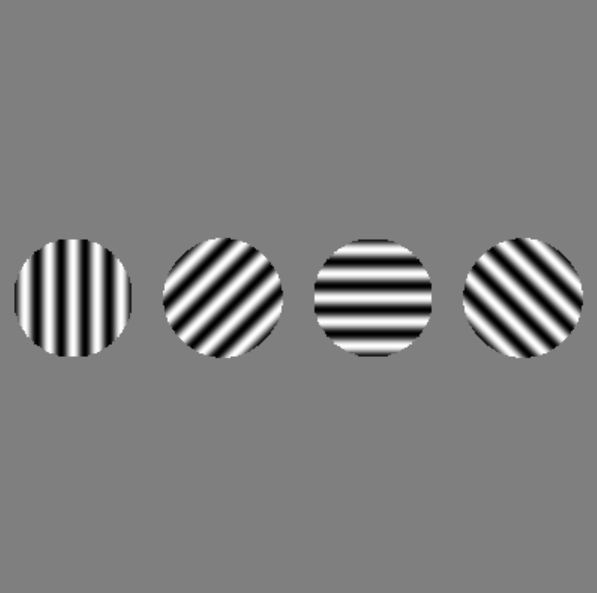

This is an extremely high-dimensional stimulus with many different pixels (i.e. dimensions). However, we break it down into a few factors of variation, e.g. orientation and frequency. Methods to uncover such underlying factors of variation are called **dimensionality reduction**.

We therefore operationalize "What is the structure of the data?" by looking at dimensionality reduction. There are many different possible ways of performing dimensionality reduction. One important such method is **Principal Component Analysis (PCA)**.

Below is a simple example:

In [47]:
x = np.random.multivariate_normal(mean=np.array([0., 0.]), cov=np.array([[1., 0.9], [0.9, 1.]]), size=(100,))

This data is two-dimensional:

In [ ]:
x.shape

If we look at each dimension, we don't really understand how the different variables are related:

In [ ]:
plt.hist(x[:,0])

In [ ]:
plt.hist(x[:,1])

However, if we plot a scatter plot, we can see some dominant components:

In [ ]:
plt.scatter(x[:,0], x[:,1])

With two dimensions, we can do this by visual inspection. For higher-dimensional data, we need to use PCA, which is an algorithm that can identify directions of *variance* in our data.

How can we implement PCA in Python? To figure out how to solve our problems in Python, we first need to find a package that will be pertinent to our use case, and then the specific method that we need to use. Let's try this out!

Next week, we'll delve into machine learning and work our way around [PACKAGE NAME REDACTED]